In [23]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
from rdkit import Chem
from rdkit.Chem import Descriptors
# pd.set_option('display.max_rows', None)
import numpy as np

In [2]:
# specify the root directory
root_dir = 'results'

dfs = []

# iterate over the directories in the root directory
for subdir in os.listdir(root_dir):
    subdir_path = os.path.join(root_dir, subdir)
    if os.path.isdir(subdir_path):
        
        # specify important files in the subdirectory
        json_path = os.path.join(subdir_path, "args.json")
        csv_path = os.path.join(subdir_path, "test_metrics.csv")
        
        # read in args.json
        with open(json_path, 'r') as f:
            json_data = json.load(f)
        json_df = pd.DataFrame({k:[v] for k, v in json_data.items()})
        
        # read in test_metrics.csv
        try:
            csv_df = pd.read_csv(csv_path)
        except FileNotFoundError:  # if job didn't finish, there'll be no CSV
            continue
        
        # concatentate horizontally
        df = pd.DataFrame({"directory": [subdir]})
        df = pd.concat([df, json_df, csv_df], axis=1)
        dfs.append(df)
                    
# combine the data into a single DataFrame
df = pd.concat(dfs, ignore_index=True)


# df = df[df['split_type'] == 'random']
# df = df[df['split_type'] == 'scaffold']
# df = df[df['split_type'] == 'h298']
# df = df[df['split_type'] == 'molwt']
# df = df[df['split_type'] == 'atom']

# df['data_file'] = df['data_file'].apply(lambda x: float(x.split('/')[-1].split('_')[-1][:-4]))
# df = df[df['data_file'] == 0.001]

df = df[df['hf_col_name'] == 'peakwavs_max']

df.sort_values(by=['model_type', 'data_file', 'add_pn_bias_to_make_lf', 'add_constant_bias_to_make_lf', 'add_gauss_noise_to_make_lf', 'add_descriptor_bias_to_make_lf', 'lf_hf_size_ratio'])

,directory,model_type,data_file,hf_col_name,lf_col_name,scale_data,save_test_plot,num_epochs,export_train_and_val,add_pn_bias_to_make_lf,...,lf_hf_size_ratio,lf_superset_of_hf,seed,results_dir,MAE_hf,RMSE_hf,R2_hf,MAE_lf,RMSE_lf,R2_lf
159,2023-11-05_21-35-43.738674,delta_ml,/home/gridsan/kgreenman/mf_benchmark/chemprop/...,peakwavs_max,energy_max_osc_nm,True,False,30,False,0,...,1,True,1,results,53.153449,60.127345,0.671140,NaN,NaN,NaN
162,2023-11-05_21-31-08.687039,delta_ml,/home/gridsan/kgreenman/mf_benchmark/chemprop/...,peakwavs_max,energy_max_osc_nm,True,False,30,False,0,...,1,True,2,results,29.466124,32.326115,0.893826,NaN,NaN,NaN
299,2023-11-05_20-56-47.907479,delta_ml,/home/gridsan/kgreenman/mf_benchmark/chemprop/...,peakwavs_max,energy_max_osc_nm,True,False,30,False,0,...,1,True,0,results,40.808503,49.333994,0.795727,NaN,NaN,NaN
304,2023-11-05_21-09-07.564882,delta_ml,/home/gridsan/kgreenman/mf_benchmark/chemprop/...,peakwavs_max,energy_max_osc_nm,True,False,30,False,0,...,1,True,0,results,62.510356,70.992825,0.567678,NaN,NaN,NaN
458,2023-11-05_21-44-11.695554,delta_ml,/home/gridsan/kgreenman/mf_benchmark/chemprop/...,peakwavs_max,energy_max_osc_nm,True,False,30,False,0,...,1,True,2,results,44.850941,56.024770,0.736562,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6545,2023-11-05_21-21-29.987242,transfer,/home/gridsan/kgreenman/mf_benchmark/chemprop/...,peakwavs_max,energy_max_osc_nm,True,False,30,False,0,...,1,True,2,results,59.379981,63.738849,-0.001147,59.379981,63.738849,-0.001147
6634,2023-11-05_21-17-34.956593,transfer,/home/gridsan/kgreenman/mf_benchmark/chemprop/...,peakwavs_max,energy_max_osc_nm,True,False,30,False,0,...,1,True,2,results,58.987583,62.989869,0.022243,58.987583,62.989869,0.022243
7078,2023-11-05_21-11-24.397494,transfer,/home/gridsan/kgreenman/mf_benchmark/chemprop/...,peakwavs_max,energy_max_osc_nm,True,False,30,False,0,...,1,True,2,results,79.460070,100.226709,-0.009906,78.577055,99.560307,-0.007121
7262,2023-11-05_21-19-32.430189,transfer,/home/gridsan/kgreenman/mf_benchmark/chemprop/...,peakwavs_max,energy_max_osc_nm,True,False,30,False,0,...,1,True,2,results,60.582364,64.643845,-0.029779,60.582364,64.643845,-0.029779


In [3]:
df.drop(columns=['hf_col_name', 'data_file', 'lf_col_name', 'save_test_plot', 
                 'num_epochs', 'export_train_and_val', 'scale_data',
                 'results_dir'], inplace=True)

In [5]:
df_mean = df.drop(columns=['directory']).groupby(['model_type', 'add_pn_bias_to_make_lf', 'add_constant_bias_to_make_lf',
            'add_gauss_noise_to_make_lf', 'add_descriptor_bias_to_make_lf', 'lf_hf_size_ratio', 'lf_superset_of_hf', 'split_type']).mean().reset_index()
df_std = df.drop(columns=['directory']).groupby(['model_type', 'add_pn_bias_to_make_lf', 'add_constant_bias_to_make_lf',
            'add_gauss_noise_to_make_lf', 'add_descriptor_bias_to_make_lf', 'lf_hf_size_ratio', 'lf_superset_of_hf', 'split_type']).std().reset_index()

In [6]:
df_mean

,model_type,add_pn_bias_to_make_lf,add_constant_bias_to_make_lf,add_gauss_noise_to_make_lf,add_descriptor_bias_to_make_lf,lf_hf_size_ratio,lf_superset_of_hf,split_type,seed,MAE_hf,RMSE_hf,R2_hf,MAE_lf,RMSE_lf,R2_lf
0,delta_ml,0,0.0,0.0,0.0,1,True,atom,1.0,61.532699,69.153602,0.576242,NaN,NaN,NaN
1,delta_ml,0,0.0,0.0,0.0,1,True,molwt,1.0,44.325697,54.670194,0.748085,NaN,NaN,NaN
2,delta_ml,0,0.0,0.0,0.0,1,True,random,1.0,20.595493,23.280670,0.937949,NaN,NaN,NaN
3,delta_ml,0,0.0,0.0,0.0,1,True,scaffold,1.0,50.445452,54.372492,0.271098,NaN,NaN,NaN
4,multi_fidelity,0,0.0,0.0,0.0,1,True,atom,1.0,86.137302,108.511061,-0.039102,85.868094,108.217695,-0.033437
5,multi_fidelity,0,0.0,0.0,0.0,1,True,molwt,1.0,97.285885,113.307038,-0.078537,97.883109,114.043514,-0.093577
6,multi_fidelity,0,0.0,0.0,0.0,1,True,random,1.0,76.785415,97.319195,-0.006803,76.804042,97.297221,-0.006350
7,multi_fidelity,0,0.0,0.0,0.0,1,True,scaffold,1.0,60.351824,64.876496,-0.037683,60.178801,64.765922,-0.034199
8,multi_target,0,0.0,0.0,0.0,1,True,atom,1.0,85.562281,107.905533,-0.027686,85.552091,107.891492,-0.027394
9,multi_target,0,0.0,0.0,0.0,1,True,molwt,1.0,92.552622,109.519572,-0.009507,92.656268,109.624884,-0.011378


In [7]:
df_mean.split_type.value_counts()

split_type
atom        5
molwt       5
random      5
scaffold    5
Name: count, dtype: int64

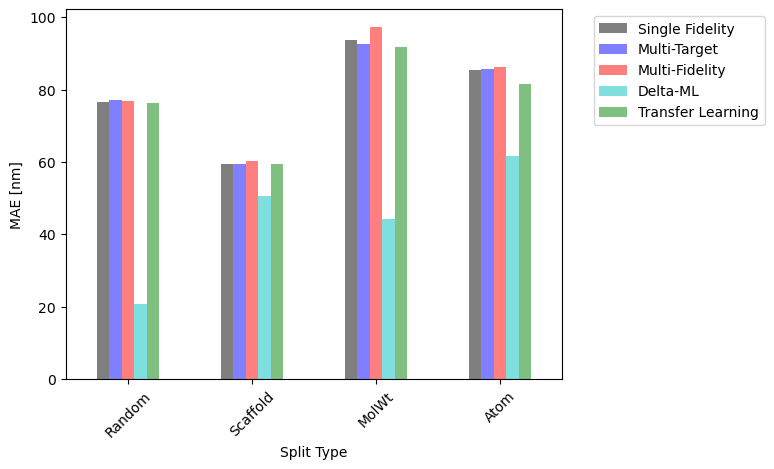

In [44]:
model_type_dict = {
    'single_fidelity': 'Single Fidelity',
    'multi_target': 'Multi-Target',
    'multi_fidelity': 'Multi-Fidelity',
    'transfer': 'Transfer Learning',
    'delta_ml': 'Delta-ML',
    'multi_fidelity_weight_sharing': 'Multi-Fidelity WS',
}

split_type_dict = {
    'atom': 'Atom',
    'h298': 'Property',
    'molwt': 'MolWt',
    'random': 'Random',
    'scaffold': 'Scaffold',
}

model_order = {'Single Fidelity': 0,
               'Multi-Target': 1,
               'Multi-Fidelity': 2,
               'Delta-ML': 3,
               'Transfer Learning': 4,
               'Multi-Fidelity WS': 5}

split_order = {'Random': 0,
                'Scaffold': 1,
                'Property': 2,
                'MolWt': 3,
                'Atom': 4,
                }

models_colors_dict = {
    'Single Fidelity': 'k',
    'Multi-Target': 'b',
    'Multi-Fidelity': 'r',
    'Delta-ML': 'c',
    'trad_delta_ml': 'm',
    'Transfer Learning': 'g',
    'multi_fidelity_weight_sharing': '',
}

df_mean['Model Type'] = df_mean['model_type'].apply(lambda x: model_type_dict[x])
df_mean['Split Type'] = df_mean['split_type'].apply(lambda x: split_type_dict[x])

df_pivot = pd.pivot_table(
	df_mean,
	values="MAE_hf",
	index="Split Type",
	columns="Model Type",
	aggfunc=np.mean
)

# sort columns by model order
df_pivot = df_pivot.reindex(sorted(df_pivot.columns, key=lambda x: model_order[x]), axis=1)

# sort rows by split order
df_pivot = df_pivot.reindex(sorted(df_pivot.index, key=lambda x: split_order[x]), axis=0)

df_pivot.plot(kind="bar", color=[models_colors_dict[x] for x in df_pivot.columns], alpha=0.5)
plt.ylabel("MAE [nm]")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('lambda_results.pdf', bbox_inches='tight')
plt.show()